In [1]:
import numpy as np
from scipy import integrate
from scipy import optimize
import scipy.ndimage as ndimage
from pycbc import conversions as con

# some constants
G = 6.67428e-11   
solarmass = 1.98892e30 # mass of sun
h = 0.6774            # hubble constant 
c = 2.99792458e8            #speed of light
pc2m = 3.086e16      # 1 pc = 3.086e16 m 
year = 3.154e7 # 1 year in seconds
pi = np.pi
loge = np.log
log10 = np.log10
au = 1.496e11

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter 
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

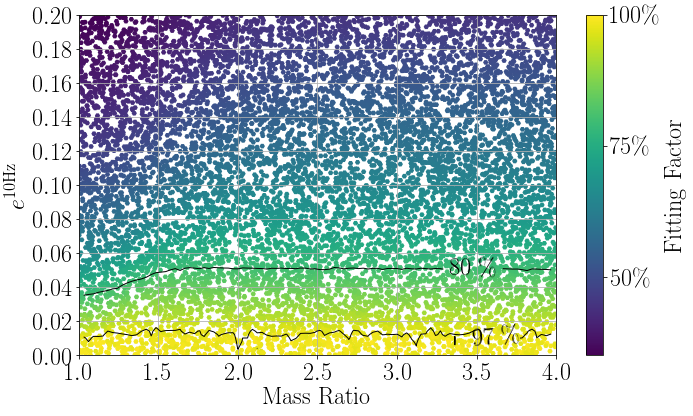

In [16]:
sim = np.loadtxt('./data/fig6-massratio.txt')
q = con.q_from_mass1_mass2(sim[:,0],sim[:,1])

fig = plt.figure() 
ax = fig.add_subplot(111) 

cs = ax.scatter(q, sim[:,2], c=sim[:,3], alpha=1,marker='H',s=28,cmap='viridis', edgecolors='None')
cbar = fig.colorbar(cs,label=r'Fitting Factor')

triang = tri.Triangulation(q, sim[:,2])
interpolator = tri.LinearTriInterpolator(triang, sim[:,3])

xi = np.linspace(1, 4,100)
yi = np.linspace(0, 0.2, 100)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

z2 = ndimage.gaussian_filter(zi, sigma=0.1, order=0)
bs = ax.contour(xi, yi, z2, levels=[0.80,0.97], linewidths=1, alpha=1,colors='black')
ax.clabel(bs,[bs.levels[0]],fmt = r'80 \%%')
ax.clabel(bs,[bs.levels[1]],fmt = r'97 \%%')


yticks = mtick.PercentFormatter(xmax=1) 
cbar.ax.yaxis.set_major_formatter(yticks) 
cbar.ax.set_ylim(np.min(sim[:,3]),1)
cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(3))



ax.set_xlabel('Mass Ratio')
ax.set_ylabel('$e^\mathrm{10Hz}$')
ax.set_xlim(1,4)
ax.set_ylim(0,0.2)
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout() 

fig.savefig('./../1-Manuscript/0121-fig7-3pn-massratio.pdf')

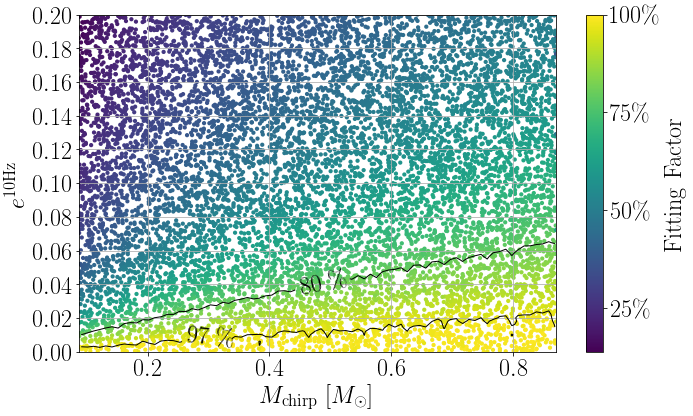

In [20]:
sim = np.loadtxt('./data/fig6-equalmass.txt')
mc = con.mchirp_from_mass1_mass2(sim[:,0],sim[:,1])

fig = plt.figure() 
ax = fig.add_subplot(111) 
cs  = ax.scatter(mc, sim[:,2], c=sim[:,3], s=18,cmap='viridis', edgecolors='None')

triang = tri.Triangulation(mc, sim[:,2])
interpolator = tri.LinearTriInterpolator(triang, sim[:,3])

xi = np.linspace(0, 1, 100)
yi = np.linspace(0, 0.2, 100)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

z2 = ndimage.gaussian_filter(zi, sigma=0.1, order=0)
bs = ax.contour(xi, yi, z2, levels=[0.80,0.97], linewidths=1, alpha=1,colors='k')
ax.clabel(bs,[bs.levels[0]],fmt = r'80 \%%',inline=1)
ax.clabel(bs,[bs.levels[1]],fmt = r'97 \%%',inline=1)

cbar = fig.colorbar(cs,label=r'Fitting Factor')
yticks = mtick.PercentFormatter(xmax=1) 
cbar.ax.yaxis.set_major_formatter(yticks) 
cbar.ax.set_ylim(np.min(sim[:,3]),1)
cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(4))


ax.set_xlabel('$M_\mathrm{chirp}~[M_\odot]$')
ax.set_ylabel('$e^\mathrm{10Hz}$')
ax.set_ylim(0,0.2)
ax.set_xlim(con.mchirp_from_mass1_mass2(0.1,0.1),con.mchirp_from_mass1_mass2(1,1))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout() 
fig.savefig('./../1-Manuscript/0121-fig6-3pn-equalmass.pdf')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


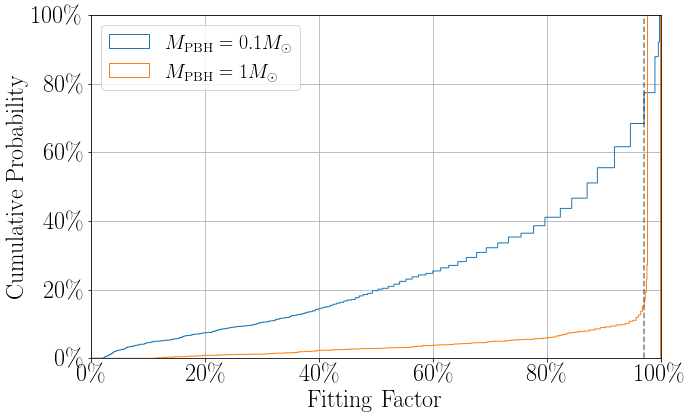

In [2]:
fig = plt.figure() 
ax = fig.add_subplot(111) 

bins = np.linspace(0,1,1001)

label=['$M_\mathrm{PBH}=0.1M_\odot$','$M_\mathrm{PBH}=1M_\odot$']

for i,file in enumerate(['fig7-m0p1','fig7-m1']):
    sim = np.loadtxt('data/'+str(file)+'.txt')
    mc = con.mchirp_from_mass1_mass2(sim[:,0],sim[:,1])
    ax.hist(sim[:,5],bins=bins,cumulative=True,density=True,histtype='step',label=label[i])

xticks = mtick.PercentFormatter(xmax=1,decimals=0) 
ax.xaxis.set_major_formatter(xticks) 
ax.yaxis.set_major_formatter(xticks) 
ax.axvline(0.97,ls='--',alpha=0.5,color='k')
ax.set_xlabel('Fitting Factor')
ax.set_ylabel('Cumulative Probability')
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.legend(loc='upper left')
fig.savefig('./../1-Manuscript/0121-fig8-3pn-cdf.pdf',bbox_inches='tight')

# Effective fitting factor

In [7]:
def eff(a,s):
    return np.cbrt(np.sum(a**3*s**3)/np.sum(s**3))

In [12]:
a = np.loadtxt('./data/fig7-m0p1.txt')
s = np.loadtxt('./data/eff-sigma-m0p1.txt')

In [13]:
eff(a[:,5],s)

0.8308261823131223

### For 0.1 solar mass PBH binaries, the effective fitting factor is 83%

In [14]:
import numpy as np

In [15]:
a = np.loadtxt('./data/fig7-morerel-m1.txt')
s = np.loadtxt('./data/eff-sigma-m1.txt')

In [16]:
eff(a[:,5],s)

0.9580990377682465

### For 1 solar mass PBH binaries, the effective fitting factor is 95.8%